# 991 Calls - Data Analysis Project

Author: Piotr Drużdżel <br> E-mail: piotr.druzdzel@gmail.com

Main objective: to practice Pandas, Plotly, Seaborn and geographical plotting with Basemap

<b>Dataset source:</b> https://www.kaggle.com/mchirico/montcoalert <br>
<b>Dataset refers to:</b> Montgomery County, Pennsylvania, USA

Columns description: <br>
<b>lat:</b> String variable, Latitude <br>
<b>lng:</b> String variable, Longitude <br>
<b>desc:</b> String variable, Description of the Emergency Call <br>
<b>zip:</b> String variable, Zipcode <br>
<b>title:</b> String variable, Title <br>
<b>timeStamp:</b> String variable, YYYY-MM-DD HH:MM:SS <br>
<b>twp:</b> String variable, Township <br>
<b>addr:</b> String variable, Address <br>
<b>e:</b> String variable, Dummy variable (always 1)

Importing the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing data from csv file:

In [2]:
df_original = pd.read_csv("911.csv")

Creating copy of the original dataframe:

In [3]:
df = df_original.copy()

### Checking basic information about the data:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639084 entries, 0 to 639083
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        639084 non-null  float64
 1   lng        639084 non-null  float64
 2   desc       639084 non-null  object 
 3   zip        561501 non-null  float64
 4   title      639084 non-null  object 
 5   timeStamp  639084 non-null  object 
 6   twp        638805 non-null  object 
 7   addr       639084 non-null  object 
 8   e          639084 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.9+ MB


Routine check for potential correlations after eliminating useless 'e' column and narrowing coordinates to Montgomery county (PA, USA):

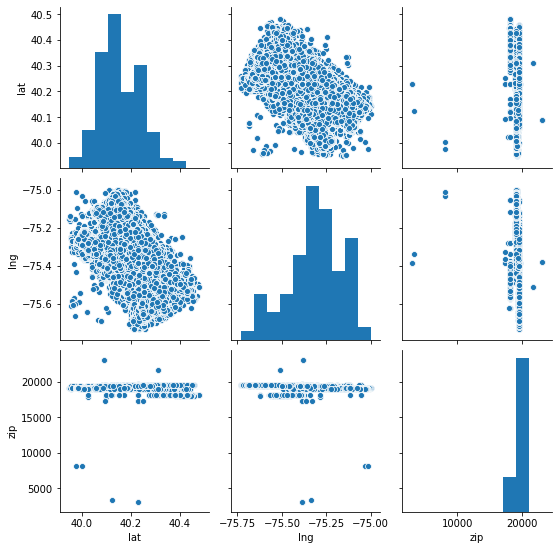

In [5]:
sns.pairplot(df[(df['lat'] < 40.5) & (df['lat'] > 39.95) & (df['lng'] > -75.75) & (df['lng'] < -75)].drop('e', axis=1))

From the number of non-null elements, it looks like there is missing data in 'zip' and 'twp' columns

Dataframe head:

In [6]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

I decided to drop the 'e' column because it does not add any value:

In [7]:
df.drop(['e'], axis=1, inplace=True)

The most common zip codes, where the emergency happened:

In [8]:
df['zip'].value_counts().head()

19401.0    43737
19464.0    42130
19403.0    33549
19446.0    31064
19406.0    21624
Name: zip, dtype: int64

They correspond to the following top 5 townships:

In [9]:
df['twp'].value_counts().head()

LOWER MERION    53640
ABINGTON        38513
NORRISTOWN      36063
UPPER MERION    34766
CHELTENHAM      29496
Name: twp, dtype: int64

### Geographical plotting:

In the current setup, it is necessary to set this env. variable to import Basemap !!!

In [10]:
import os
os.environ["PROJ_LIB"] = "C:\\Users\PDL3\\Anaconda3\\Library\\share";
from mpl_toolkits.basemap import Basemap

All the emergency calls:

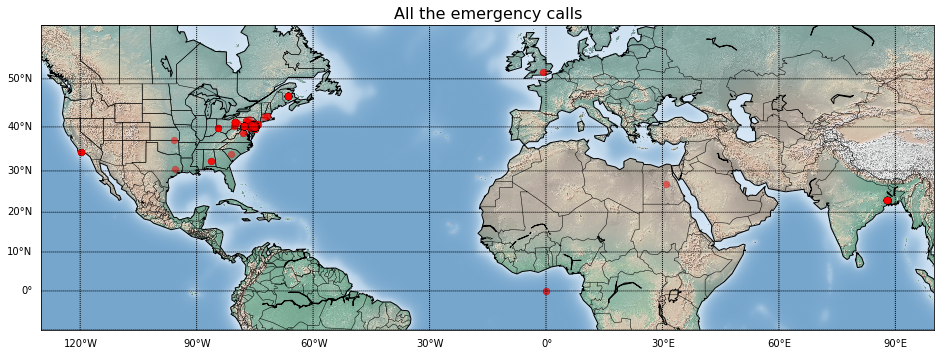

In [11]:
fig = plt.figure(figsize=(16,12))

m = Basemap(projection = 'mill',
           llcrnrlat = -10,
           urcrnrlat = 60,
            
           llcrnrlon = -130,
           urcrnrlon = 100,
            
           resolution = 'c')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.shadedrelief()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = df['lat'].to_numpy()
sites_lon_x = df['lng'].to_numpy()

colors = ['red']

m.scatter(sites_lon_x,
          sites_lat_y,
          latlon = True, 
          s = 50, 
          c = colors, 
          marker = 'o', 
          alpha = 0.5, 
          edgecolor = 'k', 
          linewidth = 0.1, 
          zorder = 2)

plt.title('All the emergency calls', fontsize=16)

plt.show()

Montgomery County, PA, USA:

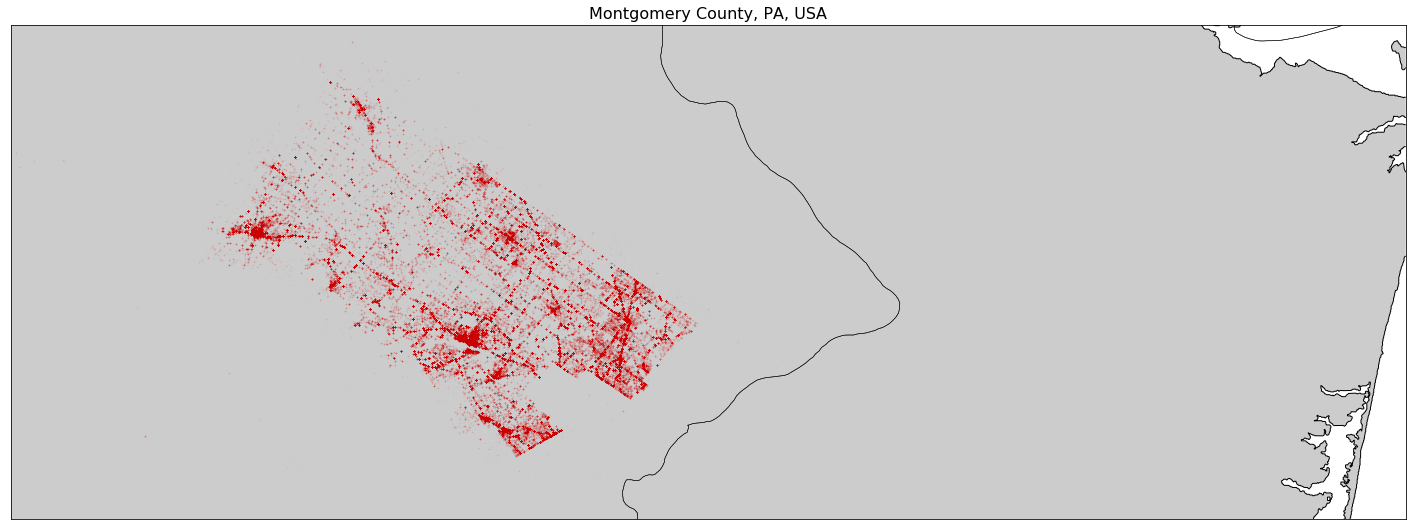

In [12]:
fig = plt.figure(figsize=(25,25))

m = Basemap(projection = 'mill',
           llcrnrlat = 39.90,
           urcrnrlat = 40.50,
            
           llcrnrlon = -76,
           urcrnrlon = -74,
            
           resolution = 'f')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.fillcontinents()

sites_lat_y = df['lat'].to_numpy()
sites_lon_x = df['lng'].to_numpy()

m.scatter(sites_lon_x,
          sites_lat_y,
          latlon = True, 
          s = 3, 
          c = 'red', 
          marker = 'o', 
          alpha = 0.01, 
          edgecolor = 'k', 
          linewidth = 0.01, 
          zorder = 2)

plt.title('Montgomery County, PA, USA', fontsize = 16)

plt.show()

In [13]:
#All:
#montgomery_lat = df[(df['lat'] < 40.5) & (df['lat'] > 39.95) & (df['lng'] > -75.75) & (df['lng'] < -75)]['lat']
#montgomery_lng = df[(df['lat'] < 40.5) & (df['lat'] > 39.95) & (df['lng'] > -75.75) & (df['lng'] < -75)]['lng']

In [14]:
coordinates_filter = (df['lat'] < 40.5) & (df['lat'] > 39.95) & (df['lng'] > -75.75) & (df['lng'] < -75)

In [15]:
coordinates = df[coordinates_filter][['lat', 'lng']]

In [16]:
coord_lat = coordinates['lat'].to_numpy()
coord_lng = coordinates['lng'].to_numpy()

### Extracting the reason for the call:

In [17]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

The most common, general reasons for the 911 call:

In [18]:
df['Reason'].value_counts()

EMS        319825
Traffic    223223
Fire        96036
Name: Reason, dtype: int64

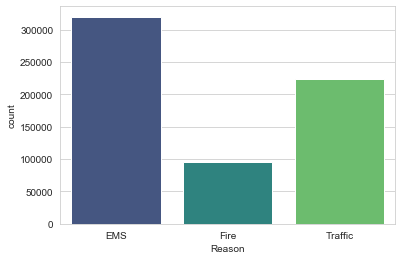

In [19]:
sns.set_style(style="whitegrid")
sns.countplot(df['Reason'], palette = 'viridis')
plt.show()

Some detailed reasons have trailing dashes and whitespaces that need to be removed to group them together:

In [20]:
dummy_1 = df['title'].apply(lambda title: title.split(':')[1])
dummy_2 = dummy_1.apply(lambda title: title.rstrip("-"))
df['Reason detailed'] = dummy_2.apply(lambda title: title.strip())

The most common general reasons for the 911 call with details:

In [21]:
df['Reason detailed'].nunique()

88

Since there is 88 various, unique causes, let's focus on 10 most common:

In [22]:
df['Reason detailed'].value_counts().head(10)

VEHICLE ACCIDENT         179930
DISABLED VEHICLE          46512
FIRE ALARM                36810
FALL VICTIM               33139
RESPIRATORY EMERGENCY     33007
CARDIAC EMERGENCY         31285
ROAD OBSTRUCTION          21698
SUBJECT IN PAIN           18913
HEAD INJURY               17544
GENERAL WEAKNESS          11349
Name: Reason detailed, dtype: int64

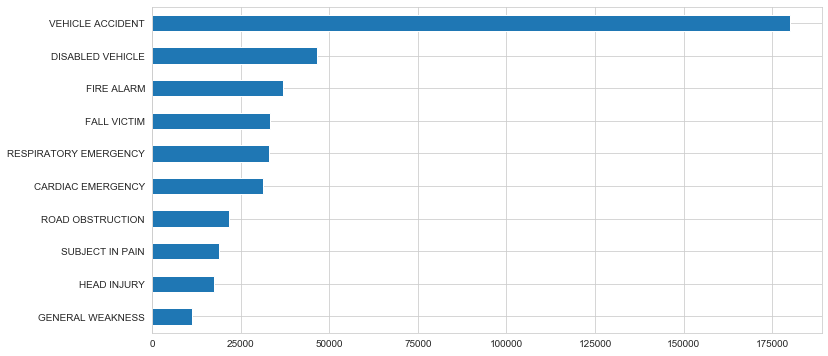

In [23]:
plt.figure(figsize=(12,6))
data = df['Reason detailed'].value_counts().head(10).sort_values()
data.plot(kind='barh')
plt.show()

It looks like 'Vehicle Accident' is the most common reason for 991 call. <br>
I will try to isolate the coordinates of these calls to inspect if there is possibly a dangerous road connection:

991 calls by reason:

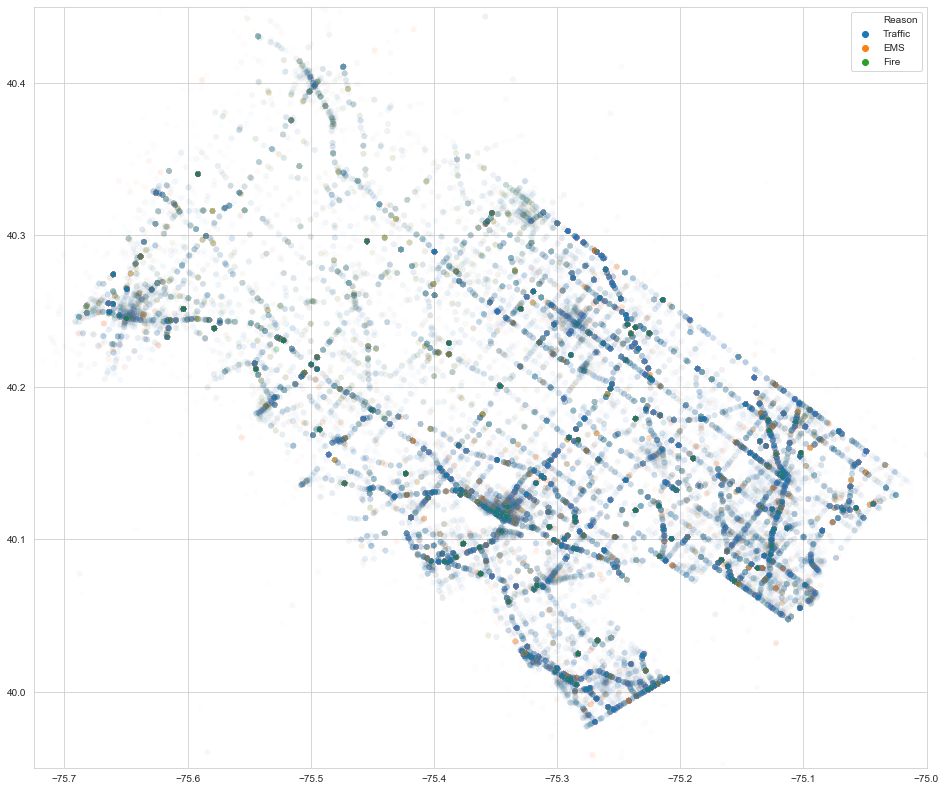

In [24]:
reason = 'VEHICLE ACCIDENT'

lat_veh_acc = df[df['Reason detailed'] == reason]['lat'].to_numpy()
lng_veh_acc = df[df['Reason detailed'] == reason]['lng'].to_numpy()

plt.figure(figsize=(16,14))

sns.scatterplot(lng_veh_acc,
                lat_veh_acc,
                hue = df[df['Reason detailed'] == reason]['Reason'],
                alpha=0.01)

plt.xlim(-75.725, -75)
plt.ylim(39.95, 40.45)

plt.show()

The exact names of the townships where vehicle accident happened the most:

In [25]:
df[df['Reason detailed'] == 'VEHICLE ACCIDENT']['twp'].value_counts().head()

LOWER MERION    17597
UPPER MERION    13506
ABINGTON         9567
CHELTENHAM       9153
NORRISTOWN       7052
Name: twp, dtype: int64

We can see that the vast majority of the vehicle accidents takes place in the eastern part of the county. <br>
They are more populated, busy and congested areas so this makes sense.

Let's plot all the main reasons:

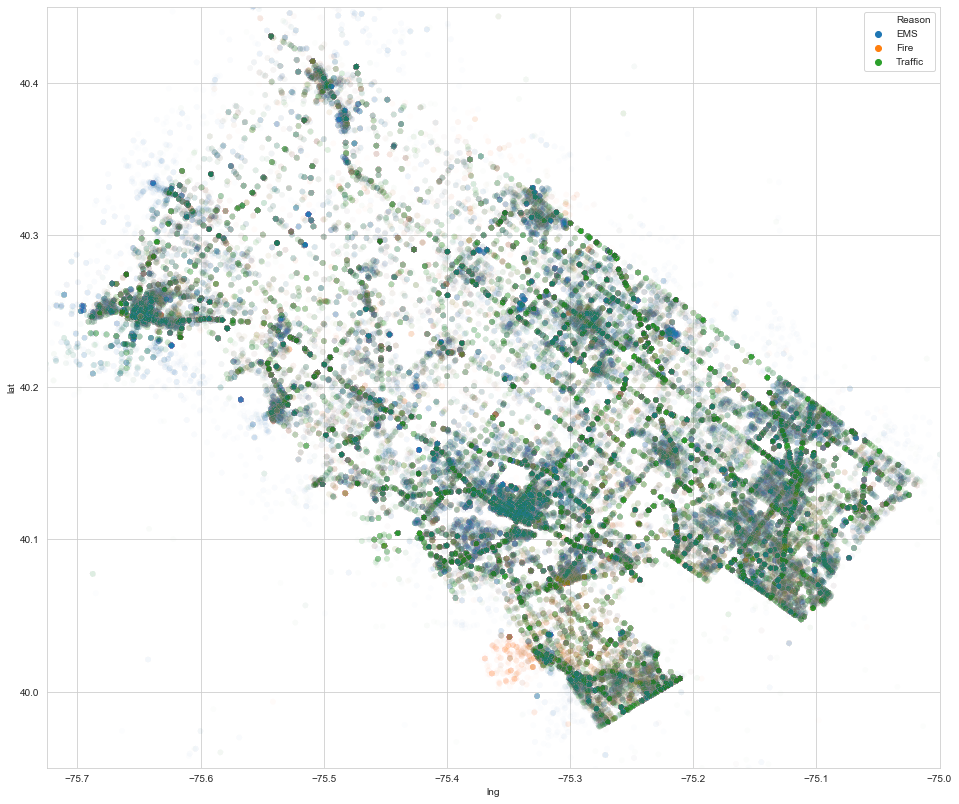

In [26]:
plt.figure(figsize=(16,14))

sns.scatterplot(df['lng'],
                df['lat'],
                hue = df['Reason'],
                alpha=0.01)

plt.xlim(-75.725, -75)
plt.ylim(39.95, 40.45)

plt.show()

991 calls for vehicle accidents only:

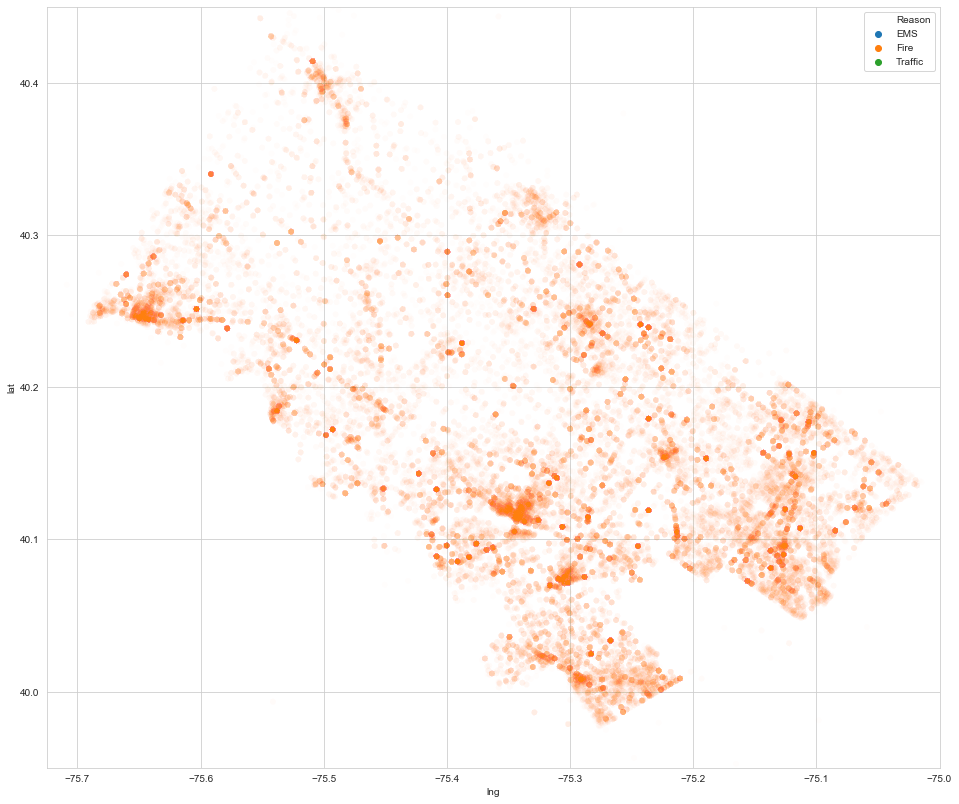

In [27]:
plt.figure(figsize=(16,14))

sns.scatterplot(df[df['Reason'] == 'Fire']['lng'],
                df[df['Reason'] == 'Fire']['lat'],
                hue = df['Reason'],
                alpha=0.01)

plt.xlim(-75.725, -75)
plt.ylim(39.95, 40.45)

plt.show()

Even, if we isilate only 'fire' - the number of data points os so big, that despite using different transparency levels, it is difficult to isolate the regions that really stand out.

### Criminal activity

Looking for original reasons for 991 calls to isolate interesting clusters:

In [28]:
df['Reason detailed'].value_counts().tail(50)

UNRESPONSIVE SUBJECT            2699
WOODS/FIELD FIRE                2380
UNKNOWN TYPE FIRE               1862
FIRE POLICE NEEDED              1521
DEHYDRATION                     1476
EMS SPECIAL SERVICE             1347
APPLIANCE FIRE                  1218
CHOKING                         1176
TRASH/DUMPSTER FIRE             1102
MATERNITY                        942
ELEVATOR EMERGENCY               886
RESCUE - ELEVATOR                758
S/B AT HELICOPTER LANDING        709
RESCUE - GENERAL                 639
VEHICLE LEAKING FUEL             610
ANIMAL BITE                      556
RESCUE - WATER                   528
BURN VICTIM                      481
DEBRIS/FLUIDS ON HIGHWAY         451
HEAT EXHAUSTION                  277
EYE INJURY                       269
SHOOTING                         222
POISONING                        208
STABBING                         205
PUMP DETAIL                      170
TRANSFERRED CALL                 138
AMPUTATION                        98
H

In [29]:
reason = 'ASSAULT VICTIM'

lat_veh_acc = df[df['Reason detailed'] == reason]['lat'].to_numpy()
lng_veh_acc = df[df['Reason detailed'] == reason]['lng'].to_numpy()

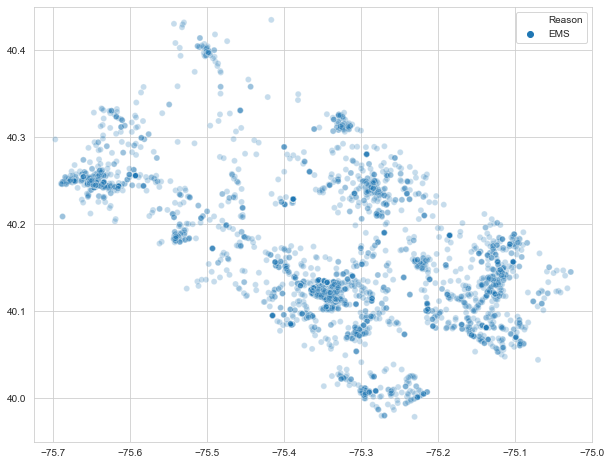

In [30]:
plt.figure(figsize=(10,8))

sns.scatterplot(lng_veh_acc,
                lat_veh_acc,
                hue = df[df['Reason detailed'] == reason]['Reason'],
                alpha=0.25)

plt.xlim(-75.725, -75)
plt.ylim(39.95, 40.45)

plt.show()

In the following 5 townships, 'assault' occurs the most often:

In [31]:
df[df['Reason detailed'] == reason]['twp'].value_counts().head(5)

NORRISTOWN      963
POTTSTOWN       487
ABINGTON        200
LOWER MERION    176
CHELTENHAM      148
Name: twp, dtype: int64

Stabbing may be related to 'assault' type of criminal activity:

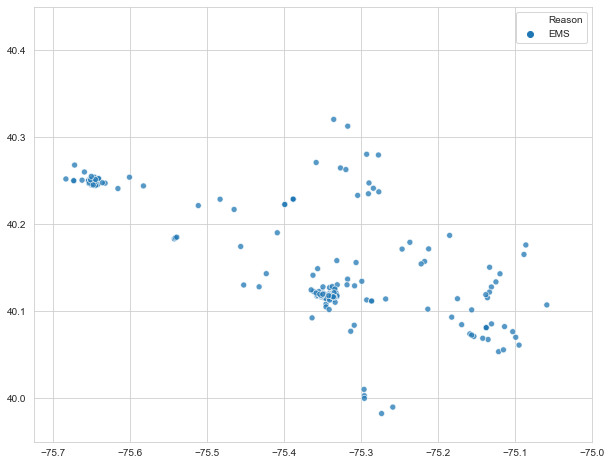

In [32]:
reason = 'STABBING'

lat_veh_acc = df[df['Reason detailed'] == reason]['lat'].to_numpy()
lng_veh_acc = df[df['Reason detailed'] == reason]['lng'].to_numpy()

plt.figure(figsize=(10,8))

sns.scatterplot(lng_veh_acc,
                lat_veh_acc,
                hue = df[df['Reason detailed'] == reason]['Reason'],
                alpha=0.75)

plt.xlim(-75.725, -75)
plt.ylim(39.95, 40.45)

plt.show()

In [33]:
df[df['Reason detailed'] == reason]['twp'].value_counts().head(5)

NORRISTOWN    75
POTTSTOWN     38
CHELTENHAM    17
ABINGTON       7
PLYMOUTH       6
Name: twp, dtype: int64

And again the 'winner' is Norristown and Pottstown (airport area). These are populated areas where people can potentially carry more cash with them.

In [34]:
risky_towns = df[(df['Reason detailed'] == reason) & 
                ((df['twp'] == 'NORRISTOWN') |
                 (df['twp'] == 'POTTSTOWN')  |
                 (df['twp'] == 'CHELTENHAM') |
                 (df['twp'] == 'ABINGTON')   |
                 (df['twp'] == 'PLYMOUTH'))]

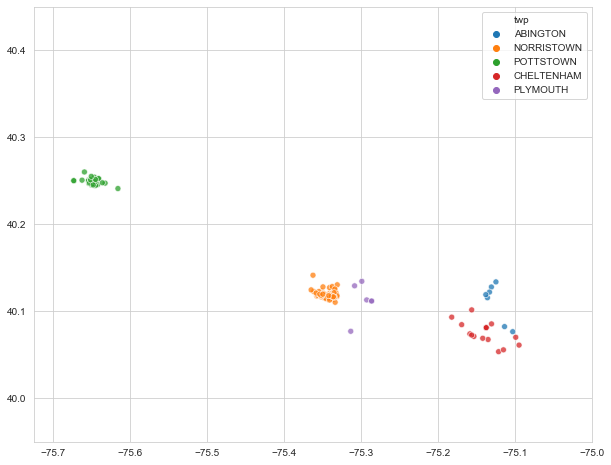

In [35]:
reason = 'STABBING'

lat_veh_acc = risky_towns['lat'].to_numpy()
lng_veh_acc = risky_towns['lng'].to_numpy()

plt.figure(figsize=(10,8))

sns.scatterplot(lng_veh_acc,
                lat_veh_acc,
                hue = risky_towns['twp'],
                alpha=0.75)

plt.xlim(-75.725, -75)
plt.ylim(39.95, 40.45)

plt.show()

### Let's look at crime over the years:

Converting timeStamp column into a DateTime object:

In [36]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

Creating new, separate columns for time:

In [37]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df['Year'] = df['timeStamp'].apply(lambda time: time.year)

I will select several 'detailed' reasons to isolate the cases: <br>
ASSAULT VICTIM, SHOOTING, STABBING, BOMB DEVICE FOUND, PRISONER IN CUSTODY, ACTIVE SHOOTER, ARMED SUBJECT, HIT + RUN

In [38]:
criminal_cases = df[(df['Reason detailed'] == 'ASSAULT VICTIM') |
                    (df['Reason detailed'] == 'SHOOTING') |
                    (df['Reason detailed'] == 'STABBING') |
                    (df['Reason detailed'] == 'BOMB DEVICE FOUND') |
                    (df['Reason detailed'] == 'PRISONER IN CUSTODY') |
                    (df['Reason detailed'] == 'ACTIVE SHOOTER') |
                    (df['Reason detailed'] == 'ARMED SUBJECT') |
                    (df['Reason detailed'] == 'HIT + RUN')]
                    
criminal_cases['Reason detailed'].value_counts()

ASSAULT VICTIM         4004
SHOOTING                222
STABBING                205
BOMB DEVICE FOUND        10
ACTIVE SHOOTER            3
ARMED SUBJECT             2
PRISONER IN CUSTODY       1
HIT + RUN                 1
Name: Reason detailed, dtype: int64

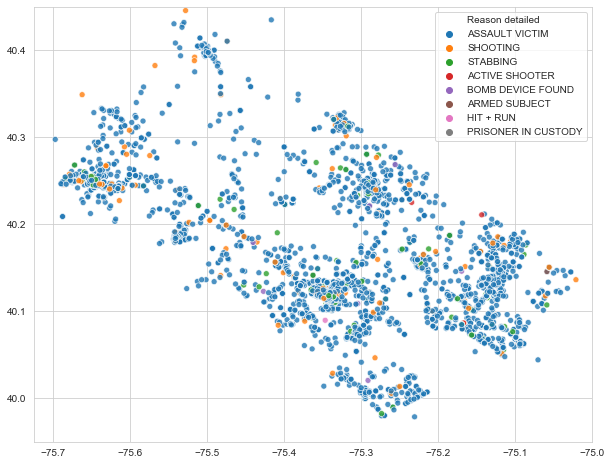

In [39]:
plt.figure(figsize=(10,8))

sns.scatterplot(criminal_cases['lng'].to_numpy(),
                criminal_cases['lat'].to_numpy(),
                hue = criminal_cases['Reason detailed'],
                alpha=0.8)

plt.xlim(-75.725, -75)
plt.ylim(39.95, 40.45)

plt.show()

With filtering out assault (since it's an overwhelming majority):

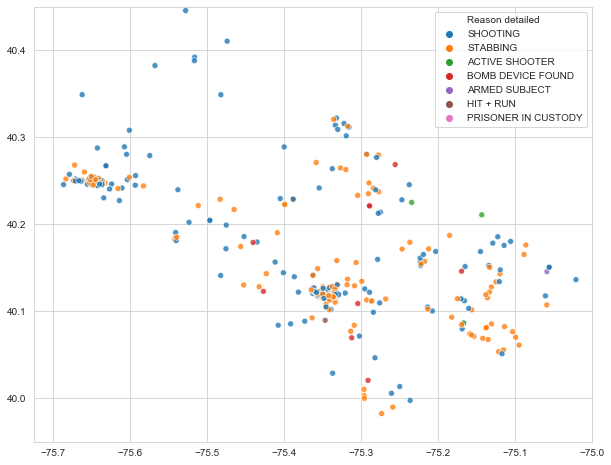

In [40]:
criminal_cases_no_assault = criminal_cases[criminal_cases['Reason detailed'] != 'ASSAULT VICTIM']

plt.figure(figsize=(10,8))

sns.scatterplot(criminal_cases_no_assault['lng'].to_numpy(),
                criminal_cases_no_assault['lat'].to_numpy(),
                hue = criminal_cases_no_assault['Reason detailed'],
                alpha=0.8)

plt.xlim(-75.725, -75)
plt.ylim(39.95, 40.45)

plt.show()

I decided to drop 2015 and 2020 as they are not representative enough.

In [41]:
crime_byYear = criminal_cases.groupby(by='Year').count()
crime_byYear.drop([2015, 2020], axis=0, inplace = True)
crime_byYear['Reason']

Year
2016    1038
2017     981
2018     982
2019    1031
Name: Reason, dtype: int64

### Subplots and unstacking

In [42]:
criminal_cases_filtered = criminal_cases[(criminal_cases['Year'] != 2015) & (criminal_cases['Year'] != 2020)]

In [43]:
crime2016 = criminal_cases_filtered[criminal_cases_filtered['Year'] == 2016].groupby(by='Month').count()['Reason']
crime2017 = criminal_cases_filtered[criminal_cases_filtered['Year'] == 2017].groupby(by='Month').count()['Reason']
crime2018 = criminal_cases_filtered[criminal_cases_filtered['Year'] == 2018].groupby(by='Month').count()['Reason']
crime2019 = criminal_cases_filtered[criminal_cases_filtered['Year'] == 2019].groupby(by='Month').count()['Reason']

In [44]:
#crime_byMonth.unstack(level=0).plot(subplots=True, stacked=True)

In [45]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=1)

fig.append_trace(go.Scatter(
    name = 2016,
    x=crime2016.index,
    y=crime2016),
    row=1, col=1)

fig.append_trace(go.Scatter(
    name = 2017,
    x=crime2017.index,
    y=crime2017), 
    row=2, col=1)

fig.append_trace(go.Scatter(
    name = 2018,
    x=crime2018.index,
    y=crime2018), 
    row=3, col=1)

fig.append_trace(go.Scatter(
    name = 2019,
    x=crime2019.index,
    y=crime2019), 
    row=4, col=1)


fig.update_layout(height=600, 
                  width=600, 
                  title_text = "Crime activity per year per month")
fig.show()

In [46]:
year_month = criminal_cases_filtered.groupby(['Year', 'Month']).count()['Reason'].unstack()
year_month

Month  1   2   3   4    5    6    7    8    9   10  11  12
Year                                                      
2016   71  65  77  87   89   99  103  107  111  72  95  62
2017   64  68  73  71   82  104  106   83   63  87  96  84
2018   72  74  78  83   85   85   96   85   79  86  84  75
2019   87  70  72  78  103   85   88  108   84  90  88  78

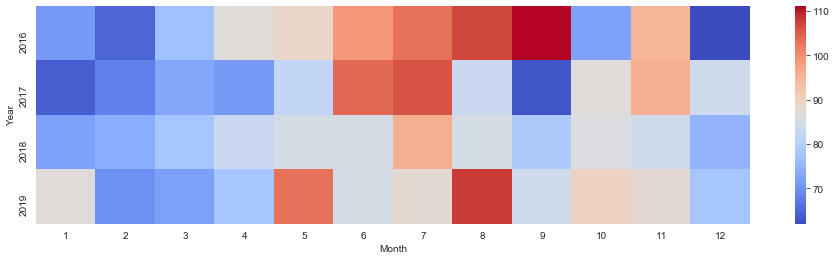

In [47]:
plt.figure(figsize=(16,4))
sns.heatmap(year_month, cmap='coolwarm')

Crime activity seems to be larger in the summer.

### Using Plotly and grouping per 'Year':

In [48]:
import plotly.express as px

df_plotly = crime_byYear
fig = px.scatter(crime_byYear, 
                 x=crime_byYear.index, 
                 y="Reason", 
                 trendline="ols")
fig.show()

When we look at the crime from the linear regression viewpoint (Ordinary Least Squares - 'OLS') - the crime is slowly decreasing.

### Date and time of the 991 calls:

Mapping day names instead of numbers for the 'Day of the week' column:

In [49]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of week'] = df['Day of week'].map(dmap)

A countplot of the Day of Week column with the hue based off of the Reason column:

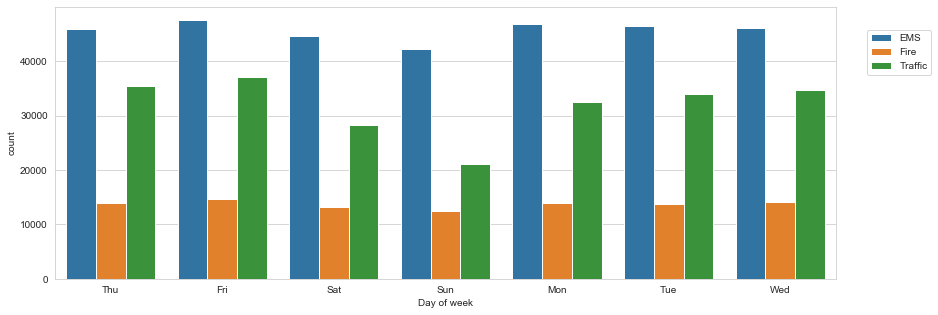

In [50]:
plt.figure(figsize = (14,5))
sns.countplot(df['Day of week'], hue=df['Reason'])
plt.legend(loc=(1.04,0.75))

Similarly for month:

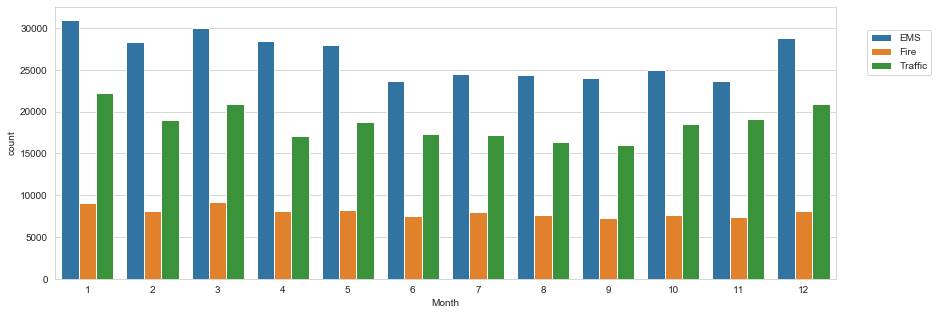

In [51]:
plt.figure(figsize = (14,5))
sns.countplot(df['Month'], hue=df['Reason'])
plt.legend(loc=(1.04,0.75))

And for Hours:

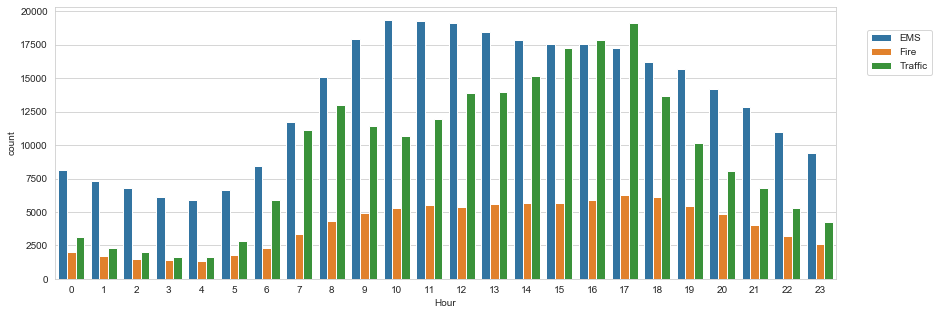

In [52]:
plt.figure(figsize = (14,5))
sns.countplot(df['Hour'], hue=df['Reason'])
plt.legend(loc=(1.04,0.75))

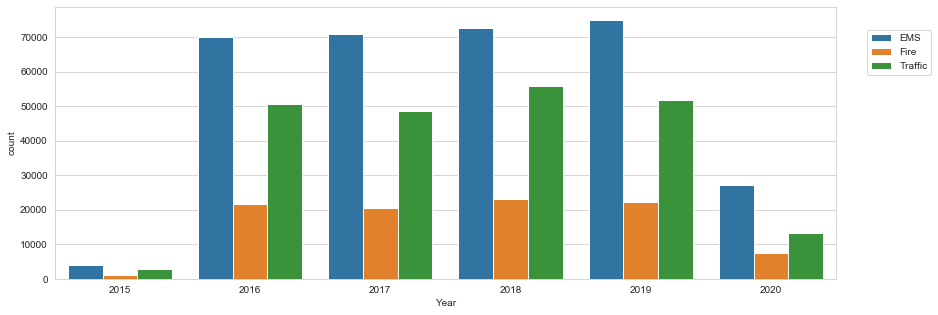

In [53]:
plt.figure(figsize = (14,5))
sns.countplot(df['Year'], hue=df['Reason'])
plt.legend(loc=(1.04,0.75))

Grouping the data by month:

In [54]:
byMonth = df.groupby(by='Month').count()
byMonth

lat    lng   desc    zip  title  timeStamp    twp   addr  Reason  \
Month                                                                       
1      62336  62336  62336  55294  62336      62336  62312  62336   62336   
2      55427  55427  55427  48922  55427      55427  55405  55427   55427   
3      60027  60027  60027  53252  60027      60027  60001  60027   60027   
4      53671  53671  53671  47349  53671      53671  53655  53671   53671   
5      54873  54873  54873  48004  54873      54873  54841  54873   54873   
6      48493  48493  48493  42223  48493      48493  48466  48493   48493   
7      49571  49571  49571  43405  49571      49571  49550  49571   49571   
8      48359  48359  48359  42311  48359      48359  48335  48359   48359   
9      47213  47213  47213  41289  47213      47213  47196  47213   47213   
10     51240  51240  51240  44582  51240      51240  51220  51240   51240   
11     50182  50182  50182  44087  50182      50182  50157  50182   50182   
12     57692  57692  57692  50783  57692      57692  57667  57692   57692   

       Reason detailed   Hour  Day of week   Year  
Month                                              
1                62336  62336        62336  62336  
2                55427  55427        55427  55427  
3                60027  60027        60027  60027  
4                53671  53671        53671  53671  
5                54873  54873        54873  54873  
6                48493  48493        48493  48493  
7                49571  49571        49571  49571  
8                48359  48359        48359  48359  
9                47213  47213        47213  47213  
10               51240  51240        51240  51240  
11               50182  50182        50182  50182  
12               57692  57692        57692  57692

### The count of calls per month:

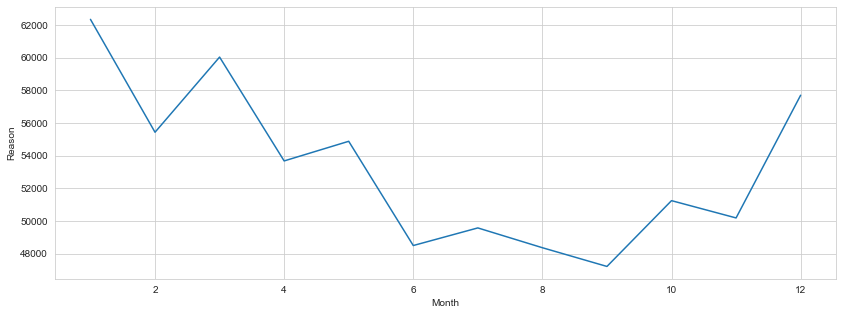

In [55]:
plt.figure(figsize = (14,5))
sns.lineplot(x = byMonth.index, y = byMonth['Reason'])
plt.show()

It looks like thera are fewer calls in the summertime and the largerst number of 991 calls happens in the winter, which given that the main reason was 'vehicle accident' may have something to do with the road conditions.

Grouping by year:

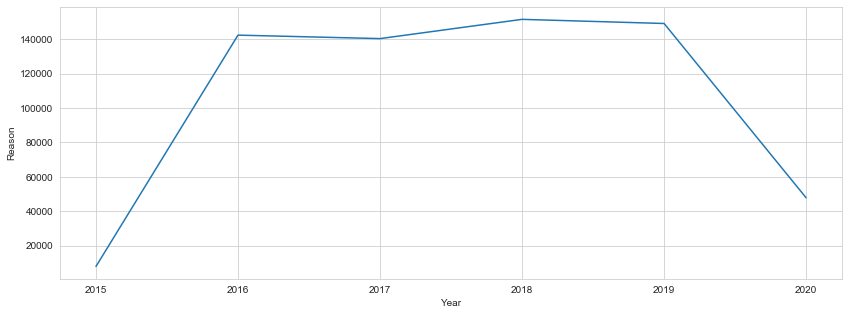

In [56]:
byYear = df.groupby(by='Year').count()

plt.figure(figsize = (14,5))
sns.lineplot(x = byYear.index, y = byYear['Reason'])
plt.show()

Above plot shows that there are fewer data points for years 2015 (only December) and 2020 (up to mid-May).

### Grouping by specific date

Creating a new column called 'Date' that contains the date from the timeStamp column:

In [57]:
df['Date'] = df['timeStamp'].apply(lambda element: element.date())

In [58]:
byDate = df.groupby(by='Date').count()

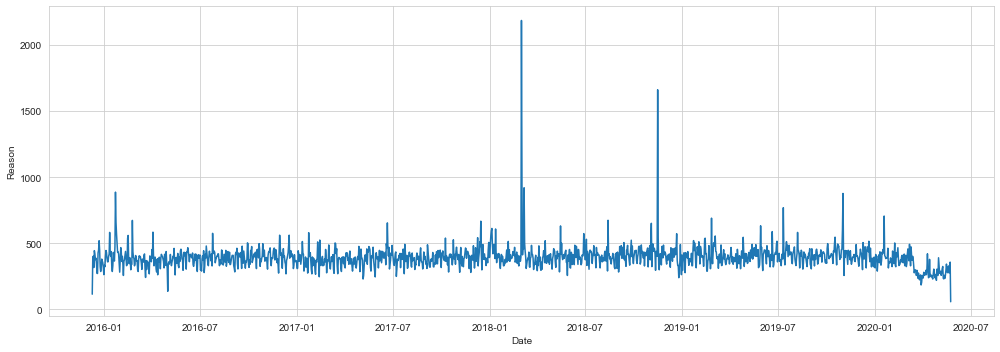

In [59]:
plt.figure(figsize = (14,5))
sns.lineplot(x = byDate.index, y = byDate['Reason'])
plt.tight_layout()

Peaks indeed take mostly place in the winter:

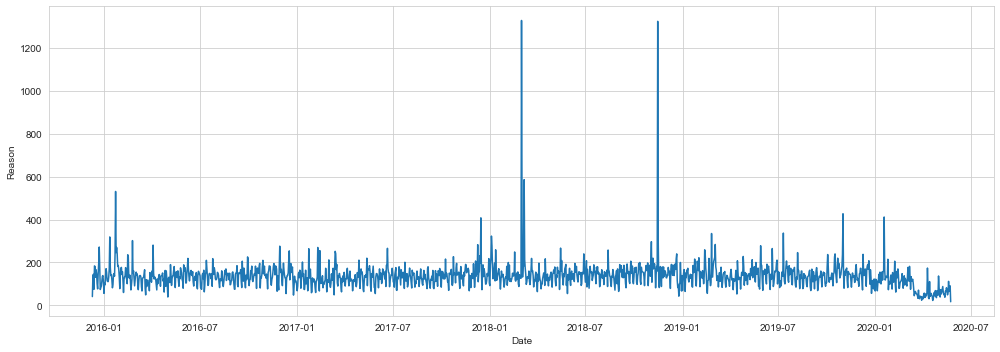

In [60]:
traffic_grouped = df[df['Reason'] == 'Traffic'].groupby('Date').count()

plt.figure(figsize = (14,5))
sns.lineplot(x = traffic_grouped.index, y = traffic_grouped['Reason'])
plt.tight_layout()

Fire in turn, mostly in the summer:

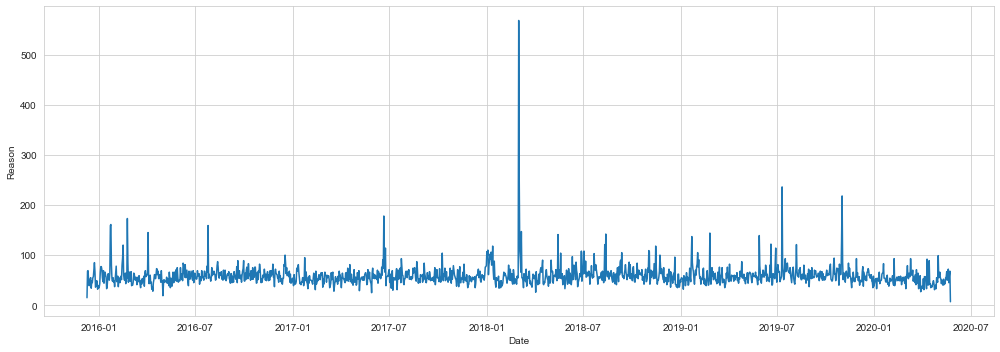

In [61]:
traffic_grouped = df[df['Reason'] == 'Fire'].groupby('Date').count()

plt.figure(figsize = (14,5))
sns.lineplot(x = traffic_grouped.index, y = traffic_grouped['Reason'])
plt.tight_layout()

EMS does not have particularly high peaks in each season, however, the number of medical calls seems to plummet slightly in the holiday periods (Christmas/New Year's Eve and summer holiday period):

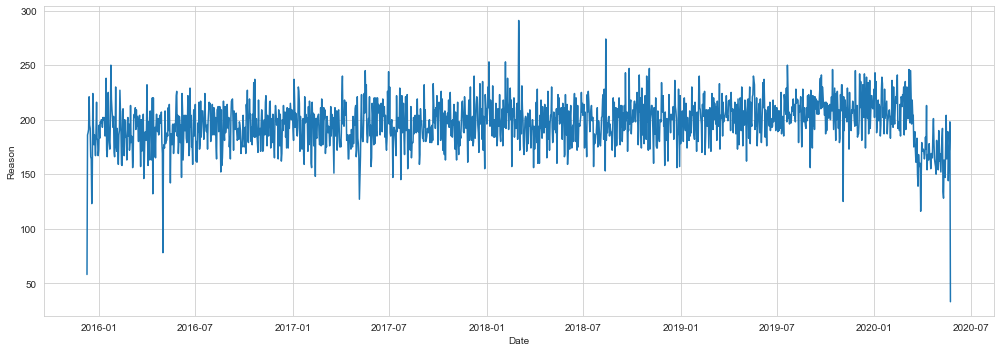

In [62]:
traffic_grouped = df[df['Reason'] == 'EMS'].groupby('Date').count()

plt.figure(figsize = (14,5))
sns.lineplot(x = traffic_grouped.index, y = traffic_grouped['Reason'])
plt.tight_layout()

### Deeper look at a peak in 2018

Something interesting must have happened in 2018 - there are noticeable peaks in this year:

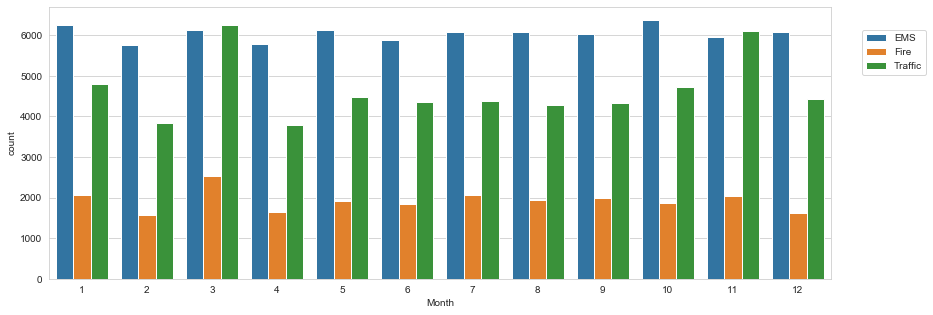

In [63]:
plt.figure(figsize = (14,5))
sns.countplot(df[df['Year'] == 2018]['Month'], hue=df['Reason'])
plt.legend(loc=(1.04,0.75))

Indeed - unusually many traffic issues in March and November 2018.

### Day of the week and hour effect:

In [64]:
days_hours = df.groupby(['Day of week', 'Hour']).count()['Reason'].unstack()
days_hours

Hour           0     1     2     3     4     5     6     7     8     9   ...  \
Day of week                                                              ...   
Fri          1913  1570  1396  1256  1283  1581  2592  4048  4888  5129  ...   
Mon          1820  1496  1311  1229  1292  1776  2597  4315  5368  5552  ...   
Sat          2350  1982  1831  1540  1392  1511  1820  2415  3339  4173  ...   
Sun          2338  2068  1874  1558  1419  1423  1679  2315  2906  3591  ...   
Thu          1648  1353  1357  1187  1217  1707  2727  4324  5170  5219  ...   
Tue          1645  1400  1275  1166  1203  1678  2703  4289  5471  5381  ...   
Wed          1599  1425  1210  1214  1078  1543  2584  4537  5323  5258  ...   

Hour           14    15    16    17    18    19    20    21    22    23  
Day of week                                                              
Fri          6158  6784  6857  6886  5476  4877  4213  3740  3298  2759  
Mon          5446  5967  6132  6195  5244  4324  3632  3116  2558  1994  
Sat          5213  4975  5018  4995  4802  4596  3975  3741  3094  2850  
Sun          4544  4301  4386  4338  4221  4001  3594  3012  2506  2227  
Thu          5865  6247  6171  6732  5333  4545  3939  3375  2735  2272  
Tue          5715  6043  6267  6675  5437  4433  3697  3272  2587  2046  
Wed          5716  6231  6518  6798  5456  4503  3955  3390  2700  2121  

[7 rows x 24 columns]

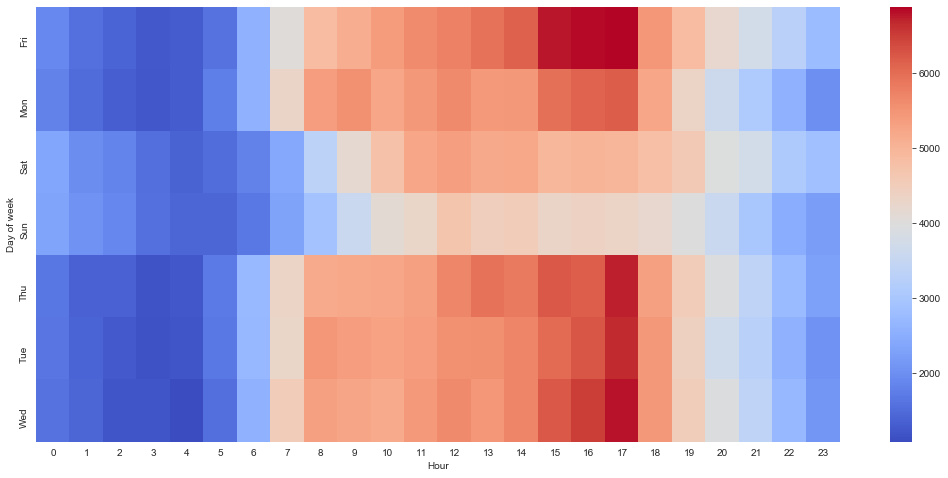

In [65]:
plt.figure(figsize=(18, 8))
sns.heatmap(days_hours, cmap = 'coolwarm')

From the above heatmap we can conclude that there are fewer calls on the weekends - particularly on Saturdays.

Checking by each reason:

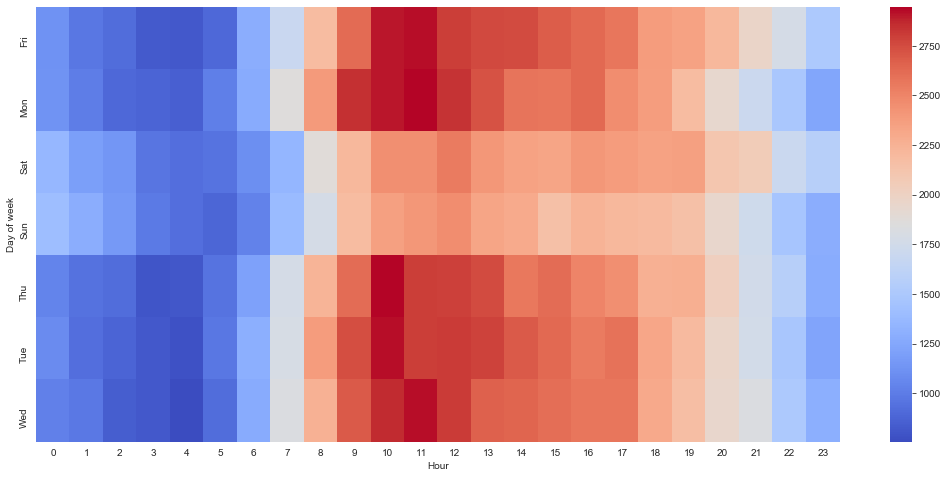

In [66]:
days_hours_ems = df[df['Reason'] == 'EMS'].groupby(['Day of week', 'Hour']).count()['Reason'].unstack()

plt.figure(figsize=(18, 8))
sns.heatmap(days_hours_ems, cmap = 'coolwarm')

Medical calls take place mostly around 10:00. Interestingly, although weekends seem to be less busy in terms of EMS, a noticably larger amount of calls happens at night on the weeknds, particularly around midnight (00:00).

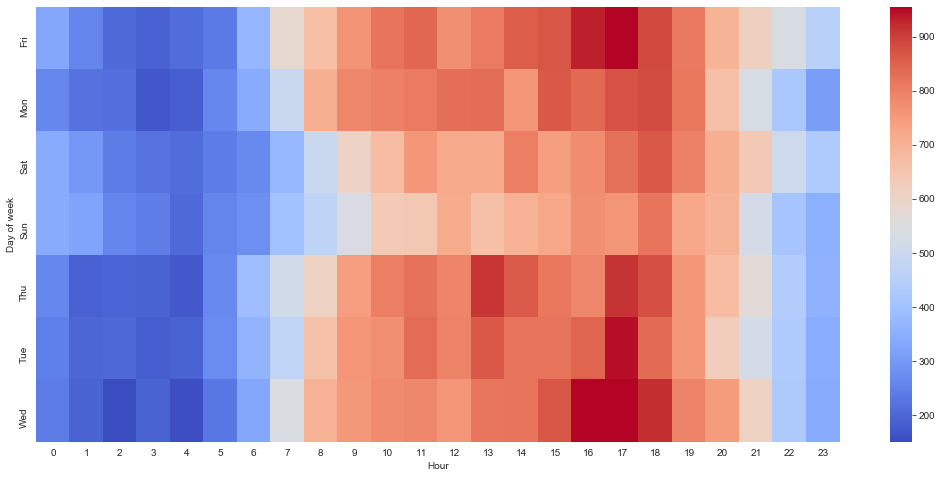

In [67]:
days_hours_fire = df[df['Reason'] == 'Fire'].groupby(['Day of week', 'Hour']).count()['Reason'].unstack()

plt.figure(figsize=(18, 8))
sns.heatmap(days_hours_fire, cmap = 'coolwarm')

Fire tends to break out during the rush hours and also less o nthe weekends.

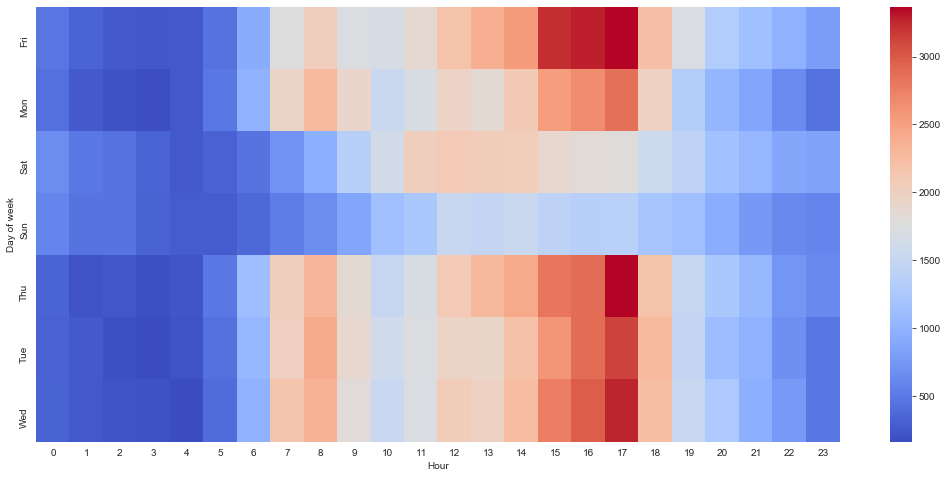

In [68]:
days_hours_traffic = df[df['Reason'] == 'Traffic'].groupby(['Day of week', 'Hour']).count()['Reason'].unstack()

plt.figure(figsize=(18, 8))
sns.heatmap(days_hours_traffic, cmap = 'coolwarm')

Traffic certainly is an issue also during the peak hours. And it looks like on Fridays many people leave 2 hours earlier.

Clustermaps:

<Figure size 1296x576 with 0 Axes>

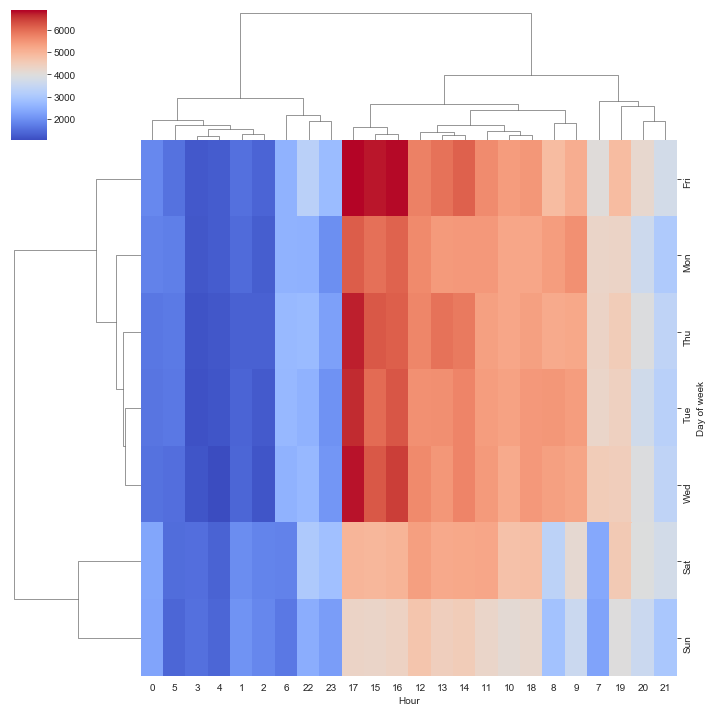

In [69]:
plt.figure(figsize=(18, 8))
sns.clustermap(days_hours, cmap = 'coolwarm')

It looks like Friday peak hours are distinguishably busy in terms of 991 calls.

### Grouping by months:

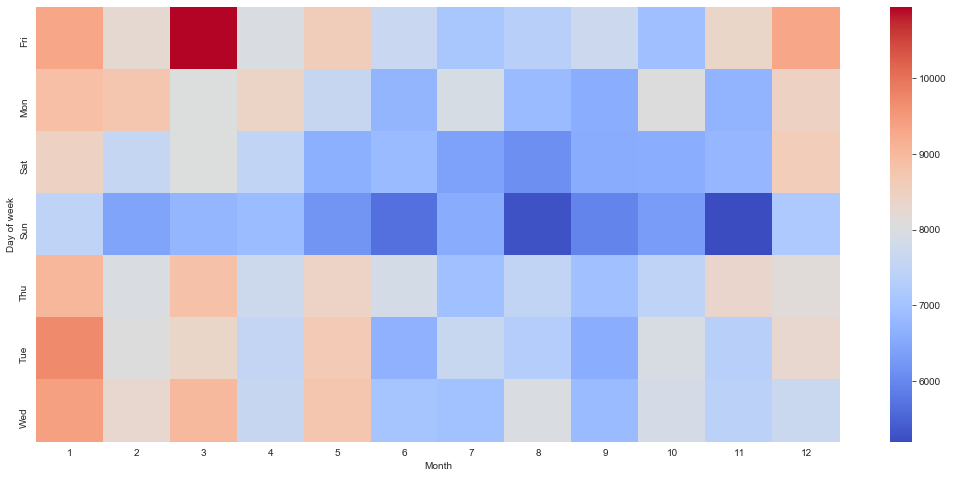

In [70]:
days_months = df.groupby(['Day of week', 'Month']).count()['Reason'].unstack()

plt.figure(figsize=(18, 8))
sns.heatmap(days_months, cmap = 'coolwarm')

Fridays in March stand out.

<Figure size 1296x576 with 0 Axes>

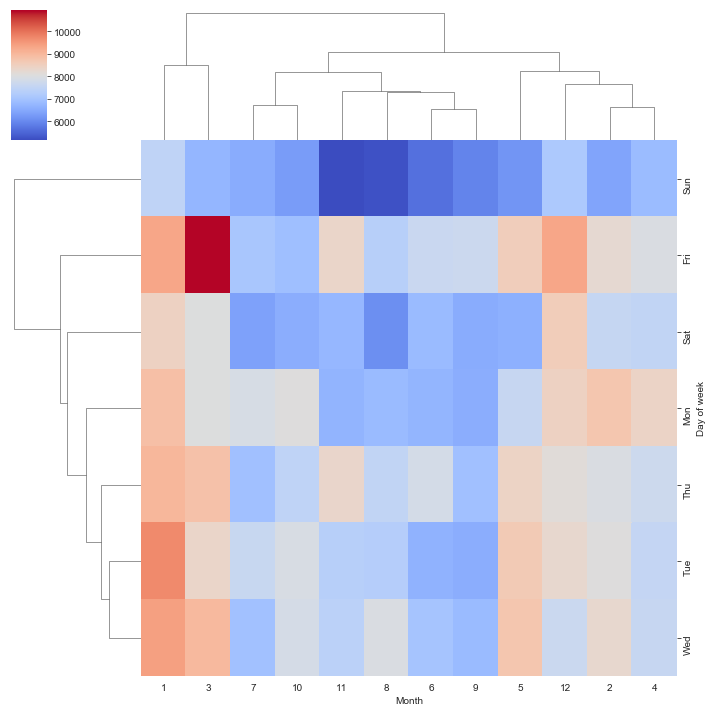

In [71]:
plt.figure(figsize=(18, 8))
sns.clustermap(days_months, cmap = 'coolwarm')

January in general seems to be more busy. Friday again has more calls.